In [1]:
import numpy as np
from sklearn.svm import LinearSVC, SVC
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
X = np.genfromtxt('processed_data/X_scaled_pca30.csv', delimiter=',')
y = np.genfromtxt('processed_data/y.csv', delimiter=',')
mask_train = np.genfromtxt('processed_data/mask_train.csv', delimiter=',', dtype=bool)

In [3]:
X_train = X[mask_train, :]
X_test = X[~mask_train, :]

y_train = y[mask_train]
y_test = y[~mask_train]

Linear SVM with Different C

In [4]:
list_C = [0.001, 0.01, 0.1, 1, 10, 100]
list_train_acc_linear = []
list_test_acc_linear = []
for C in list_C:
    print(f'-- Linear SVM (C={C}) --')
    clf = LinearSVC(dual=False, multi_class='ovr', C=C)
    clf = clf.fit(X_train, y_train)
    
    list_train_acc_linear.append(clf.score(X_train, y_train))
    list_test_acc_linear.append(clf.score(X_test, y_test))
    print(f'Train ACC: {list_train_acc_linear[-1]}')
    print(f'Test ACC: {list_test_acc_linear[-1]}')

-- Linear SVM (C=0.001) --
Train ACC: 0.86495
Test ACC: 0.8755
-- Linear SVM (C=0.01) --
Train ACC: 0.8744833333333333
Test ACC: 0.8824
-- Linear SVM (C=0.1) --
Train ACC: 0.8764166666666666
Test ACC: 0.8836
-- Linear SVM (C=1) --
Train ACC: 0.87665
Test ACC: 0.8838
-- Linear SVM (C=10) --
Train ACC: 0.8766833333333334
Test ACC: 0.884
-- Linear SVM (C=100) --
Train ACC: 0.8766833333333334
Test ACC: 0.884


In [12]:
table_linear = pd.DataFrame(columns=list_C, index=['Train Acc', 'Test Acc'])
table_linear.iloc[0, :] = list_train_acc_linear
table_linear.iloc[1, :] = list_test_acc_linear
table_linear.to_csv('table_linear.csv')
table_linear

,0.001,0.010,0.100,1.000,10.000,100.000
Train Acc,0.864833,0.874333,0.876133,0.876467,0.876483,0.876483
Test Acc,0.875,0.8822,0.8836,0.8838,0.8838,0.8838


Text(0.5, 1.0, 'Train ACC vs C (Linear SVM)')

Text(0.5, 0, 'C')

Text(0, 0.5, 'Accuracy')

([<matplotlib.axis.XTick at 0x2b710a93760>,
 [Text(0, 0, '0.001'),
  Text(1, 0, '0.01'),
  Text(2, 0, '0.1'),
  Text(3, 0, '1'),
  Text(4, 0, '10'),
  Text(5, 0, '100')])

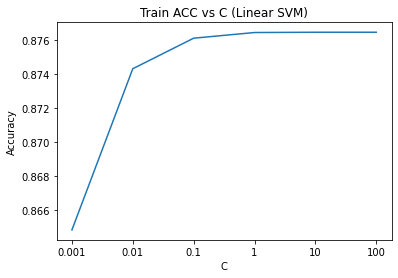

In [20]:
plt.plot(list_train_acc_linear)
plt.title('Train ACC vs C (Linear SVM)')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xticks(range(len(list_C)), list_C)
plt.savefig('train_acc_c_linear.jpg',bbox_inches='tight', dpi=150)

Text(0.5, 1.0, 'Test ACC vs C (Linear SVM)')

Text(0.5, 0, 'C')

Text(0, 0.5, 'Accuracy')

([<matplotlib.axis.XTick at 0x2b70d5882b0>,
 [Text(0, 0, '0.001'),
  Text(1, 0, '0.01'),
  Text(2, 0, '0.1'),
  Text(3, 0, '1'),
  Text(4, 0, '10'),
  Text(5, 0, '100')])

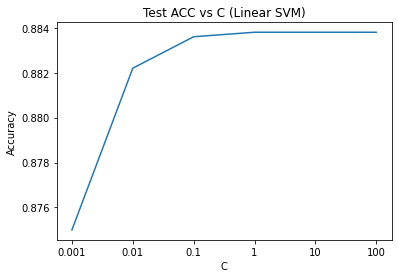

In [21]:
plt.plot(list_test_acc_linear)
plt.title('Test ACC vs C (Linear SVM)')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.xticks(range(len(list_C)), list_C)
plt.savefig('test_acc_c_linear.jpg',bbox_inches='tight', dpi=150)

RBF SVM with Different gamma

In [8]:
list_gamma = [0.1, 1, 10]
list_train_acc_rbf = []
list_test_acc_rbf = []
for gamma in list_gamma:
    print(f'-- RBF SVM (gamma={gamma}) --')
    clf = SVC(C=1, kernel='rbf', gamma=gamma, decision_function_shape='ovr')
    clf = clf.fit(X_train, y_train)
    
    list_train_acc_rbf.append(clf.score(X_train, y_train))
    list_test_acc_rbf.append(clf.score(X_test, y_test))
    print(f'Train ACC: {list_train_acc_rbf[-1]}')
    print(f'Test ACC: {list_test_acc_rbf[-1]}')

-- RBF SVM (gamma=0.1) --
Train ACC: 0.9982166666666666
Test ACC: 0.9833
-- RBF SVM (gamma=1) --
Train ACC: 1.0
Test ACC: 0.3549
-- RBF SVM (gamma=10) --
Train ACC: 1.0
Test ACC: 0.1135


In [13]:
table_rbf = pd.DataFrame(columns=list_gamma, index=['Train Acc', 'Test Acc'])
table_rbf.iloc[0, :] = list_train_acc_rbf
table_rbf.iloc[1, :] = list_test_acc_rbf
table_rbf.to_csv('table_rbf.csv')
table_rbf

,0.1,1.0,10.0
Train Acc,0.998217,1.0,1.0
Test Acc,0.9833,0.3549,0.1135


Text(0.5, 1.0, 'Train ACC vs gamma (RBF SVM)')

Text(0.5, 0, 'gamma')

Text(0, 0.5, 'Accuracy')

([<matplotlib.axis.XTick at 0x2b70d589a50>,
 [Text(0, 0, '0.1'), Text(1, 0, '1'), Text(2, 0, '10')])

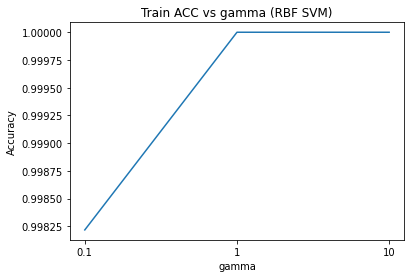

In [22]:
plt.plot(list_train_acc_rbf)
plt.title('Train ACC vs gamma (RBF SVM)')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.xticks(range(len(list_gamma)), list_gamma)
plt.savefig('train_acc_gamma_rbf.jpg',bbox_inches='tight', dpi=150)

Text(0.5, 1.0, 'Test ACC vs gamma (RBF SVM)')

Text(0.5, 0, 'gamma')

Text(0, 0.5, 'Accuracy')

([<matplotlib.axis.XTick at 0x2b70246e4d0>,
 [Text(0, 0, '0.1'), Text(1, 0, '1'), Text(2, 0, '10')])

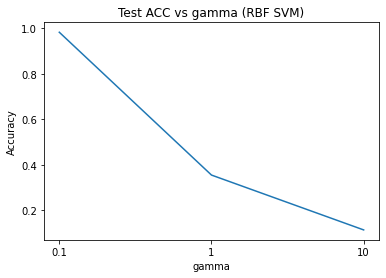

In [23]:
plt.plot(list_test_acc_rbf)
plt.title('Test ACC vs gamma (RBF SVM)')
plt.xlabel('gamma')
plt.ylabel('Accuracy')
plt.xticks(range(len(list_gamma)), list_gamma)
plt.savefig('test_acc_gamma_rbf.jpg',bbox_inches='tight', dpi=150)